# EDA on music dataset

This notebook consists of an exploratory data analysis on the [spotify dataset](https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset) from kaggle. The dataset contains 16 columns of data describing the characteristics of 114000 songs from spotify. Although the columns do not come with a description beyond their title. So, some columns, such as: *popularity* and *mode* are ambigous to what metrics they actually refer to.


### ***Table of Contents***
1. Popularity Distribution
1. Track Duration Distribution
1. Proportion of Explicit Tracks
1. Average Popularity by Genre
1. Popularity Comparison
1. Tempo Distribution by Key
1. Lowest and Highest Tempo Genres
1. Genre and Loudness
1. Tempo Distribution by Genre


Notes: 
* Some of the graphs are very busy because they contain information from all 114 genres. We decided to keep these because the only way to get around this is to combine genres, or randomly select genres.
* Code cells that are only for plotting are hidden for readability.

Team Members: **Carlos Mabrey** & **Rianna George**

### Work Breakdown

**Carlos**: 1-5 + Intro/Conclusion

**Rianna**: 6-10

### Imports / loading data

In [234]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset.csv')
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [235]:
# find all unique genres
unique_genres = df['track_genre'].unique()
num_classes = len(unique_genres)
print("genres:",num_classes, "\n\n", unique_genres)

genres: 114 

 ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 's

### Initial Impressions
* 114,000 samples
* Mean samples of this data show
    *  avg energy levels: .64
    *  avg popularity: 33.24
    *  avg duration: 2.28 minutes
    *  avg loudness: -8.26 dB
    * 1000 samples in each genre

# Popularity Distribution

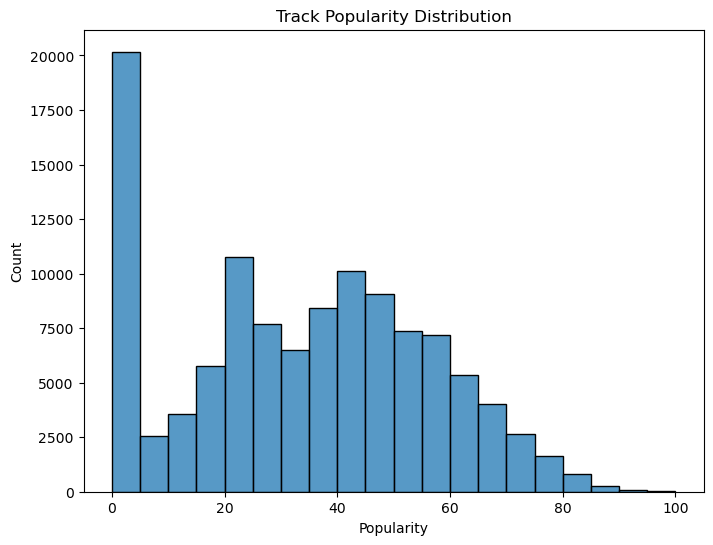

In [236]:
# Explore popularity distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], bins=20, kde=False, color='tab:blue')
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [237]:
# Count how many zeros are in the popularity column
num_zeros = len(df[df['popularity'] == 0])
#print("Number of tracks with popularity 0:", num_zeros)

# Calculate the proportion of tracks with a popularity rating of 0
prop_zero = (1-(114000-num_zeros)/114000)*100
prop_zero_rounded = round(prop_zero, 2)
prop_zero_percentage = prop_zero_rounded * 100

print(f"Songs with a popularity rating of 0 make up: {prop_zero_rounded:.2f}% of the dataset")

Songs with a popularity rating of 0 make up: 14.05% of the dataset


# Track Duration Distribution

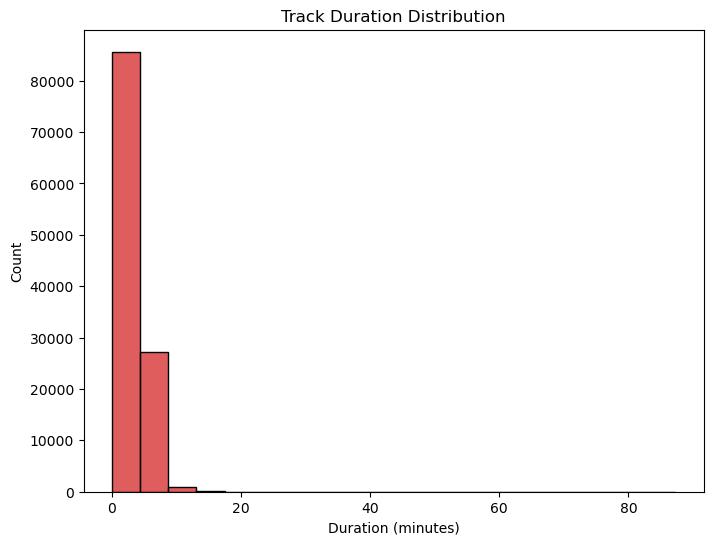

In [238]:
# Duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_ms'] / 60000, bins=20, kde=False, color='tab:red')
plt.title("Track Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

This graph shows us that some outlying data is skewing the x-axis. Let's set a threshold of 10 minutes to exclude the outliers from the plot.

In [239]:
# Find set a duration threshold of (10 minutes)
time_cutoff = df[df['duration_ms'] < 600000]

n = df.shape[0] # Total songs

# Calculate the percentage of songs longer than threshold
(time_cutoff.shape[0]/n);

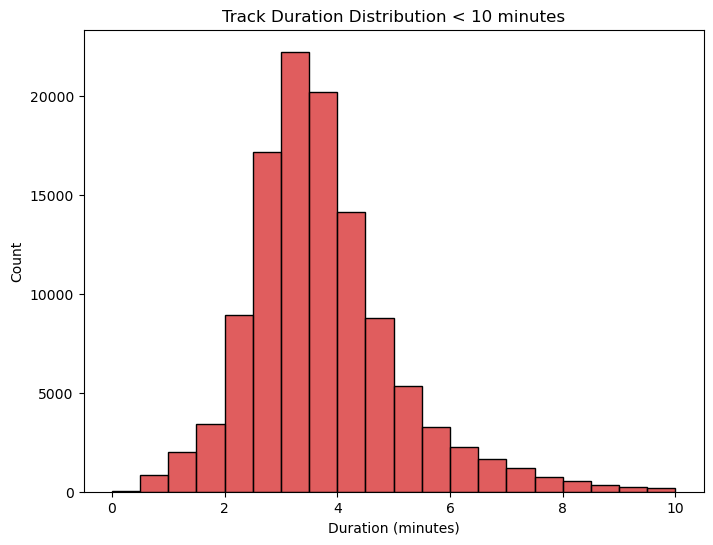

In [240]:
# Replot the data
plt.figure(figsize=(8, 6))
sns.histplot(time_cutoff['duration_ms'] / 60000, bins=20, kde=False, color='tab:red')
plt.title("Track Duration Distribution < 10 minutes")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

There are **603 songs longer than 10 minutes** - 5.4% of our data.

There are **81 songs longer than 20 minutes** - .71% of our data.

# Proportion of Explicit Tracks

In [241]:
# Proportion of explicit tracks
explicit_counts = df['explicit'].value_counts()

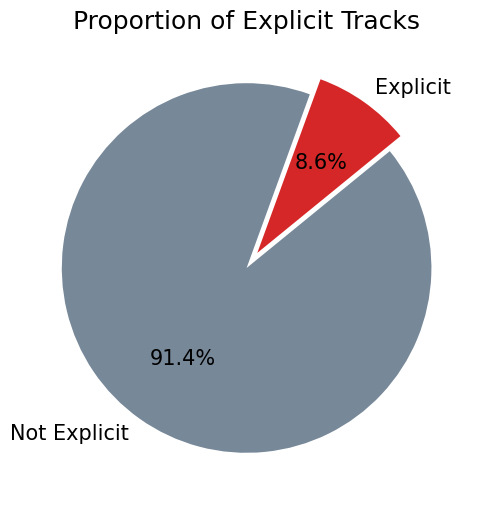

In [242]:
# Plot proportion of explicit tracks as Pie Chart
plt.figure(figsize=(8, 6))

plt.pie(explicit_counts, labels=['Not Explicit', 'Explicit'], autopct='%1.1f%%',
         startangle=70, explode=(0, 0.1), colors=['lightslategray', 'tab:red'],
           textprops={"fontsize": 15})

plt.title("Proportion of Explicit Tracks", fontsize=18)
plt.show()

Okay so only around 8.6% of songs are explicit, what genres have the most explicit music?

### Genres with the Most Explicit Tracks

In [243]:
# Group by explicit tracks
explicit = df[df['explicit'] == 1]

# Count the number of explicit tracks per genre
explicit_genre_counts = explicit['track_genre'].value_counts()

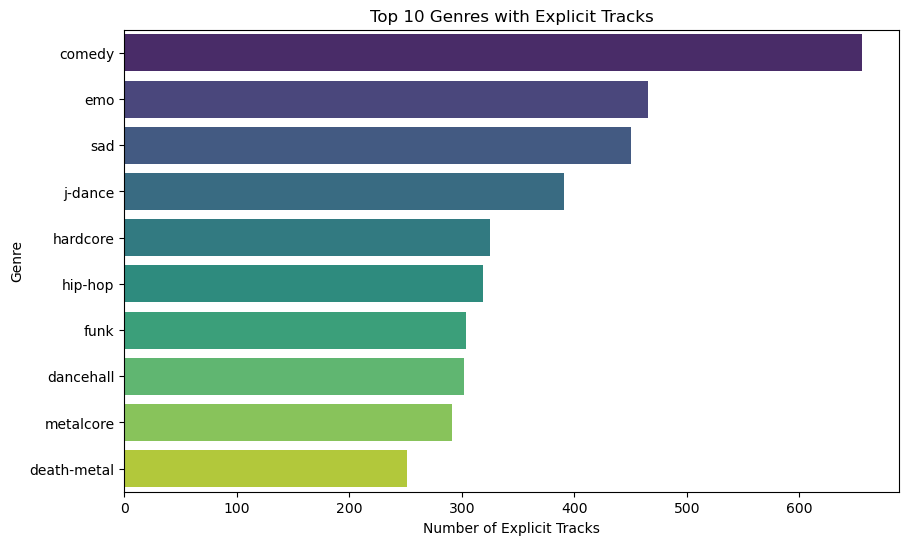

In [244]:
# Plot the top 10 genres with explicit tracks
plt.figure(figsize=(10, 6))
sns.barplot(x=explicit_genre_counts.head(10).values, y=explicit_genre_counts.head(10).index, hue=explicit_genre_counts.head(10).index, palette='viridis')
plt.title("Top 10 Genres with Explicit Tracks")
plt.xlabel("Number of Explicit Tracks")
plt.ylabel("Genre")
plt.show()

# Average Popularity by Genre

In [245]:
# Most Popular Genres
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

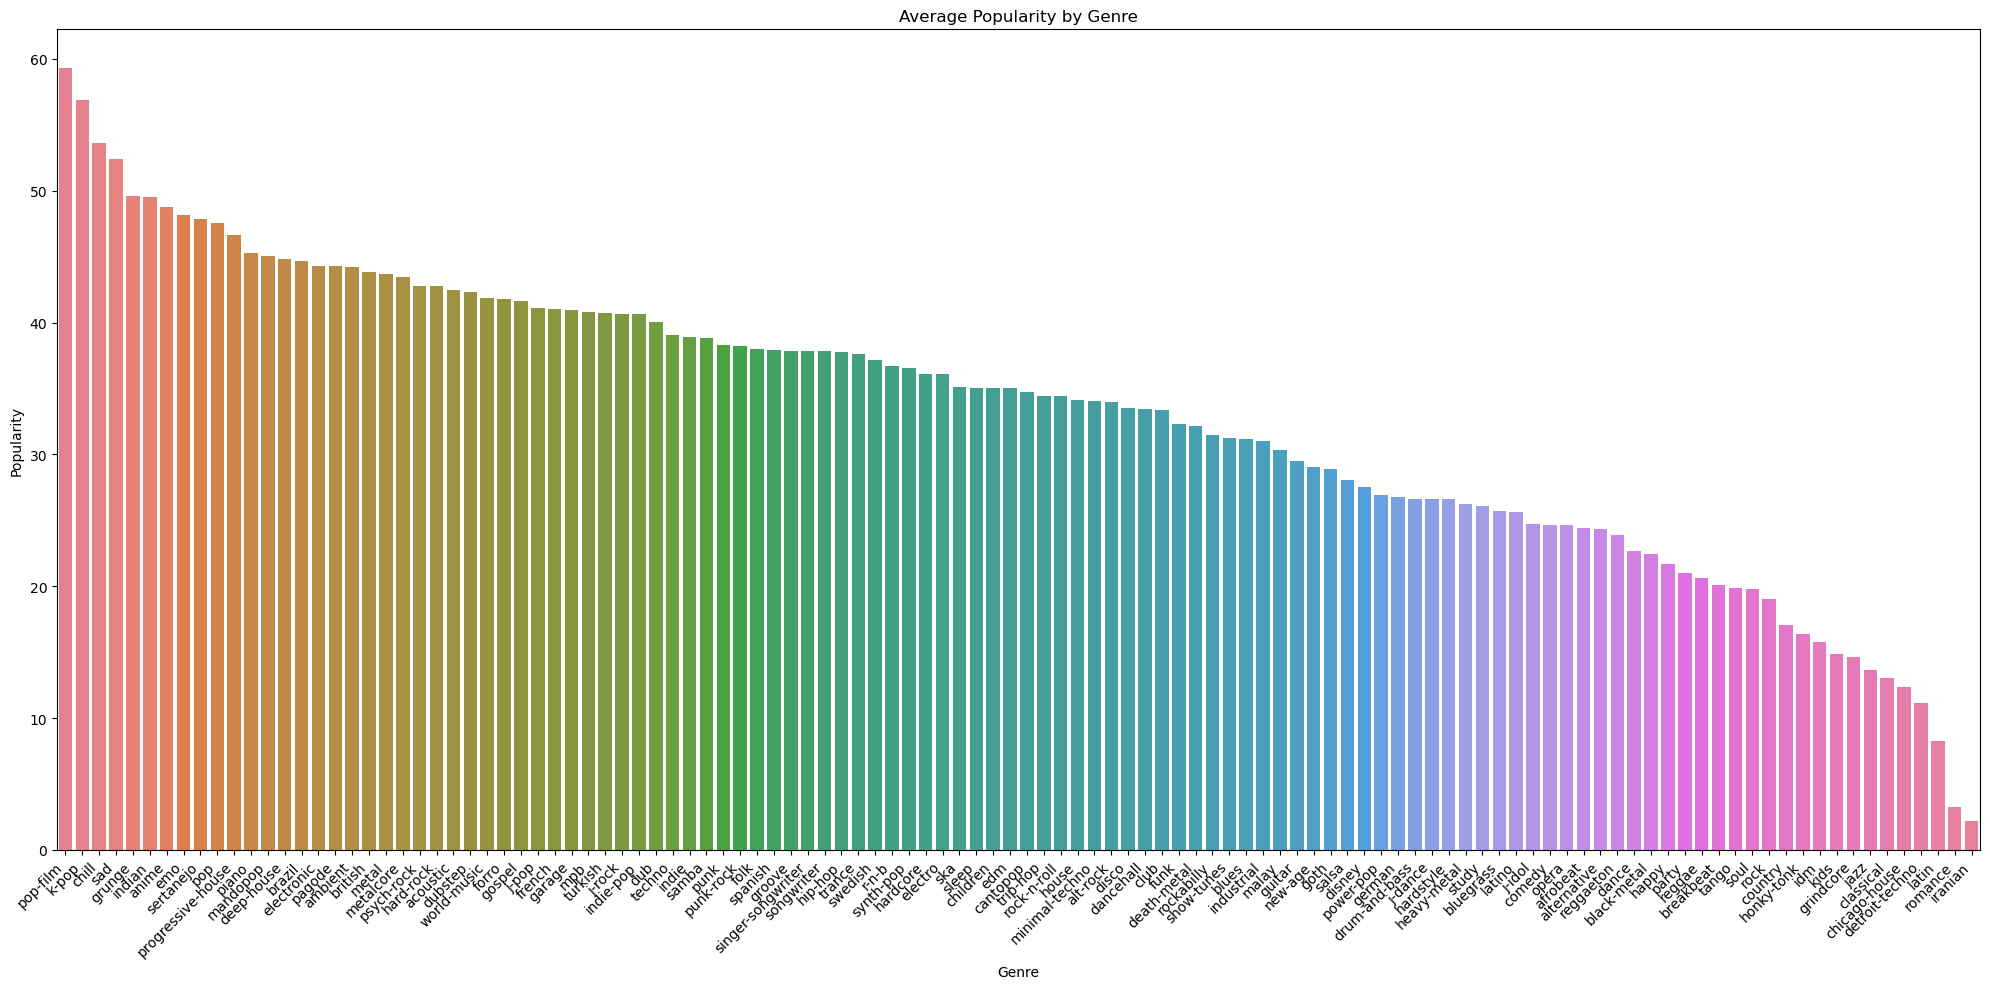

In [246]:
# Plot the average popularity of each genre
plt.figure(figsize=(20, 10))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, hue=genre_popularity.index)
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust spacing between labels
plt.show()

# Popularity Comparison

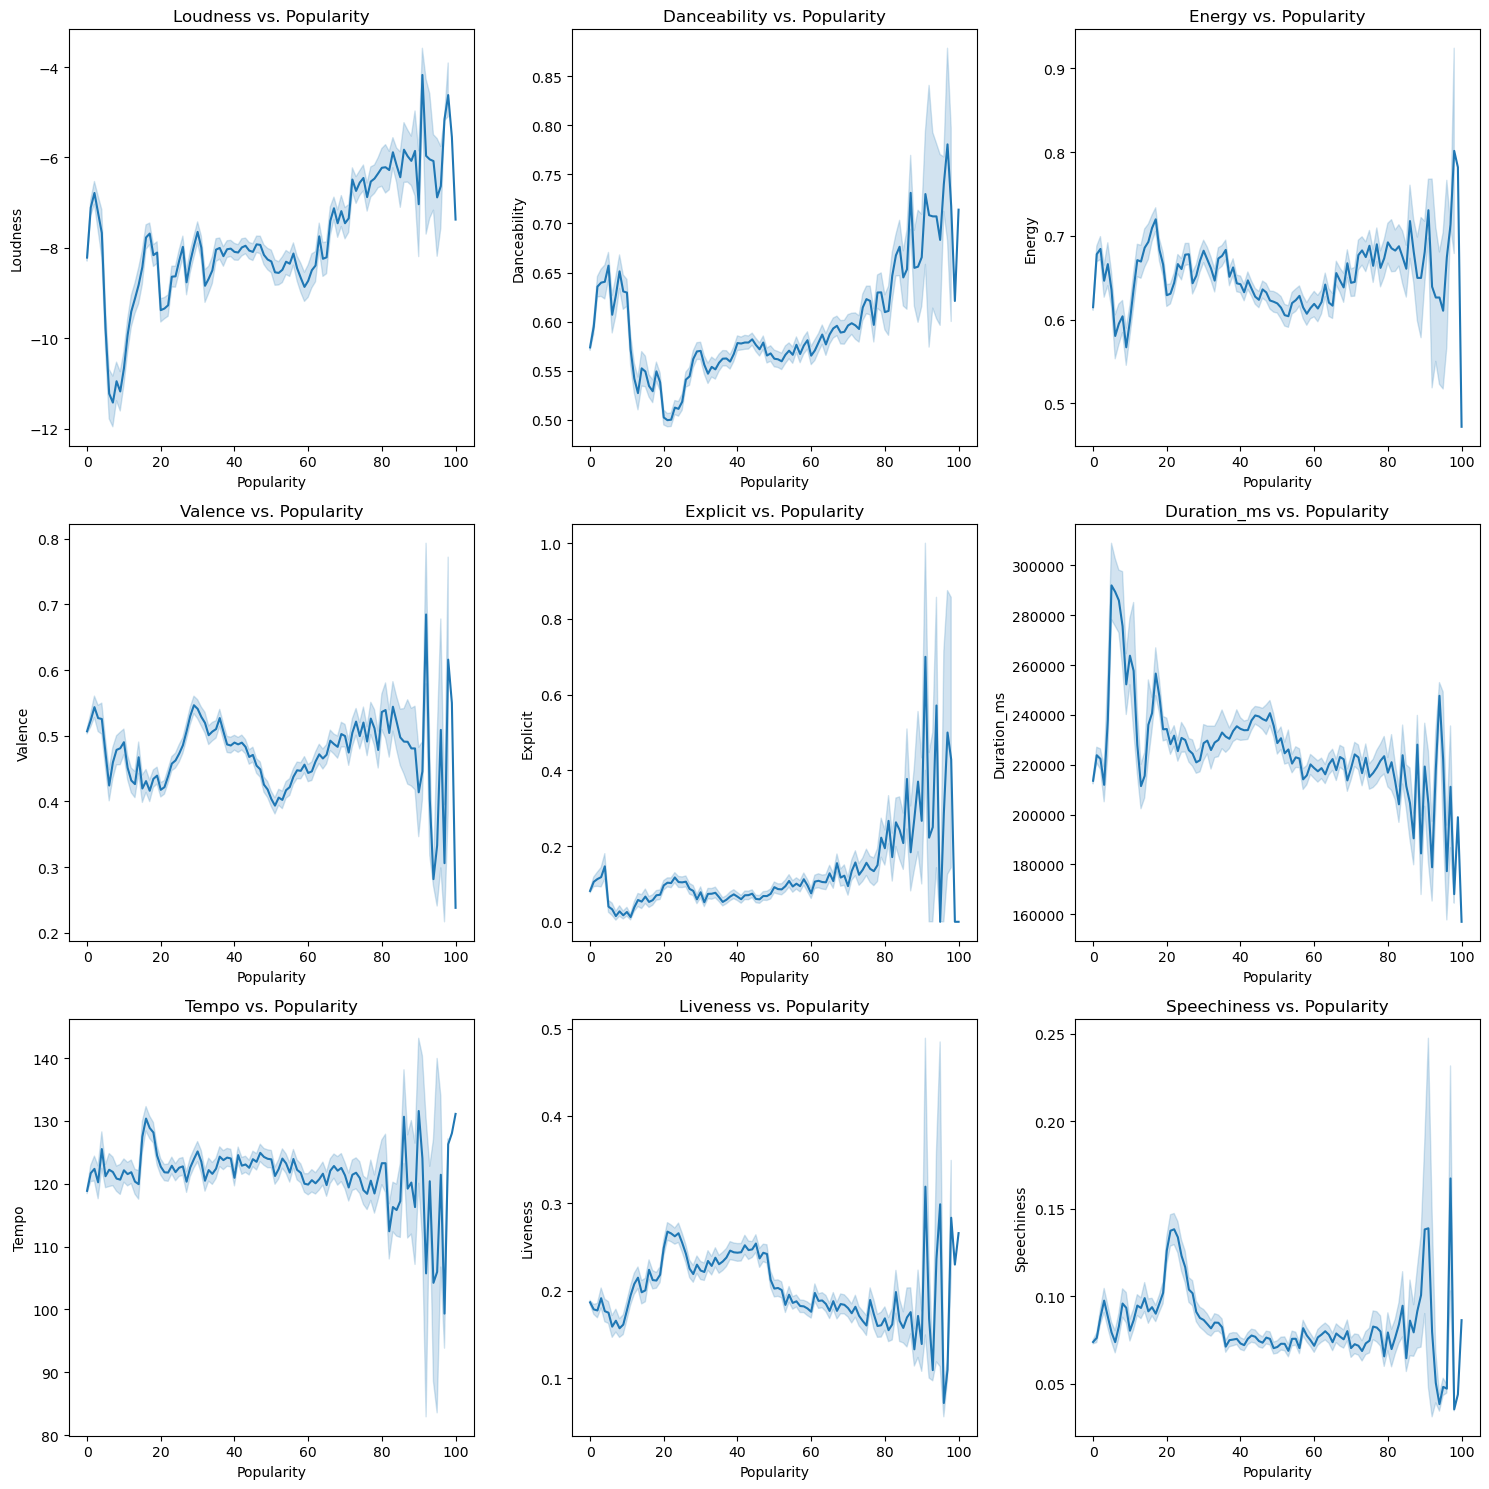

In [247]:
##### Popularity Comparison #####
# List of columns to plot against popularity
columns_to_plot = ['loudness', 'danceability', 'energy', 'valence', 'explicit', 'duration_ms', 'tempo', 'liveness', 'speechiness']

# Calculate the number of rows needed for the grid
n = len(columns_to_plot)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.lineplot(x='popularity', y=column, data=df, alpha=1, ax=ax)
    ax.set_title(f"{column.capitalize()} vs. Popularity")
    ax.set_ylabel(column.capitalize())
    ax.set_xlabel("Popularity")

plt.tight_layout()
plt.show()


### General trends:
* positive correlation between **loudness** and popularity
* positive correlation between **danceability** and popularity
* positive correlation between **explicit** and popularity
* negative correlation between **duration** and popularity
* (slight) negative correlation between **tempo** and popularity
* high popularity corresponds with **increased variance** in:
    * explicit tracks
    * valence
    * tempo
    * liveness

The data seems to have some interesting characteristics at the edges of popularity. For example, songs with popularity <5 seem to have moderate loudness, while songs between popularity of 5 and 15 have much lower levels of loudness. Perhaps this is due to the specific samples at the extreme low end of popularity. There is also a general increase in variability as popularity increases. This means that the most popular music does not sound similar, and in fact, may allude that uniqueness may be a factor that influences popularity.

## Least Popular Songs

In [374]:
# Find all songs with a popularity less than 5
lowest_rated_songs = df[df['popularity'] < 5]

small_pop_n = sum(df['popularity'] < 5)
n = len(df)

# Calculate the percentage of songs with a popularity less than 5
(small_pop_n/n)

0.17692982456140352

~17.7% of songs in our dataset have a popularity score of less than 5. Let's see if we can find any meaningful information

In [375]:
# highlight subset of "cultural" genres
highlight_genres = ['latin', 'iranian', 'country', 'latino', 'german', 'swedish', 'british', 'salsa', 'j-pop', 'spanish', 'reggae', 'french', 'j-rock', 'world-music', 'indian', 'ska', 'brazil', 'j-dance', 'samba', 'turkish', 'reggae']

# Create a list of unique genres in the data
unique_genres = lowest_rated_songs['track_genre'].unique()
# Calculate the counts of each genre
genre_counts = lowest_rated_songs['track_genre'].value_counts()
# Get a list of genres that appear less than 100 times
low_count_genres = genre_counts[genre_counts > 100].index

# Filter lowest_rated_songs
filtered_lowest_rated_songs = lowest_rated_songs[lowest_rated_songs['track_genre'].isin(low_count_genres)]

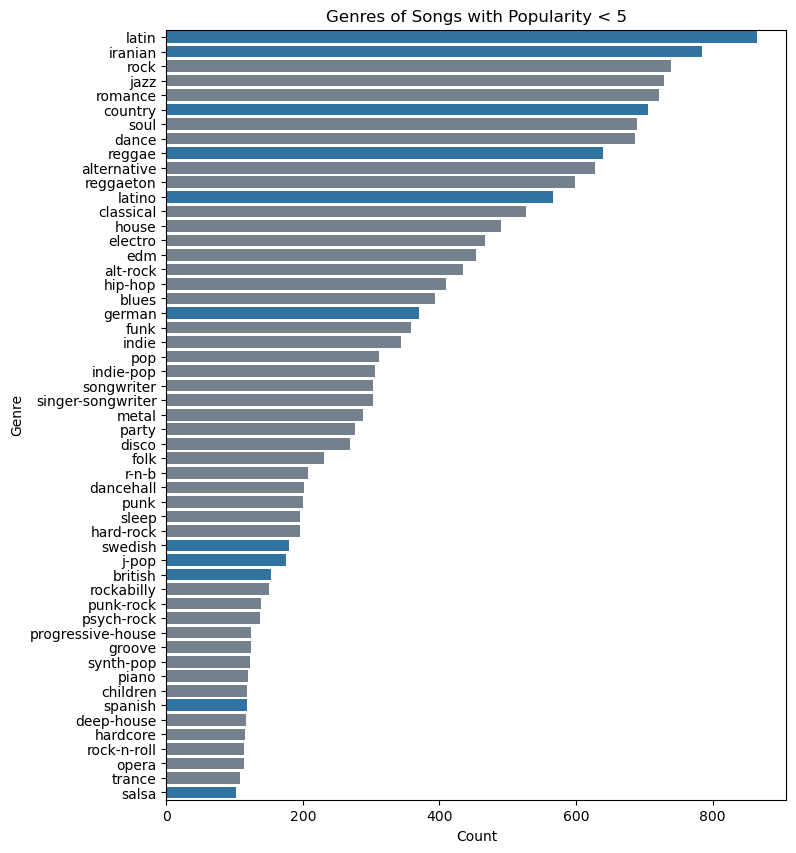

In [376]:
# Create a custom palette
palette = {genre: 'tab:blue' if genre in highlight_genres else 'slategray' for genre in unique_genres}

# Plot the distribution of genres
plt.figure(figsize=(8, 10))
sns.countplot(y='track_genre', data=filtered_lowest_rated_songs, order=filtered_lowest_rated_songs['track_genre'].value_counts().index, palette=palette, hue = 'track_genre')
plt.title("Genres of Songs with Popularity < 5")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [390]:
# Count proportion of cultural tracks
cultural_counts = lowest_rated_songs['track_genre'].isin(highlight_genres).sum()

cultural_counts/lowest_rated_songs.shape[0]

0.248388696083292

A threshold was set to only include genres with more than 100 counts and popularity levels < 5. Initially, there is not too much information other than there seem to be a fair amount of cultural genres (highlighted in purple) with low popularity score. After doing some calculations, ~25% of genres with a low popularity score are 'cultural' genres.
### Let's plot some other characteristics of low popularity songs

C:\Users\carlo\AppData\Local\Temp\ipykernel_53000\1340225228.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', n)


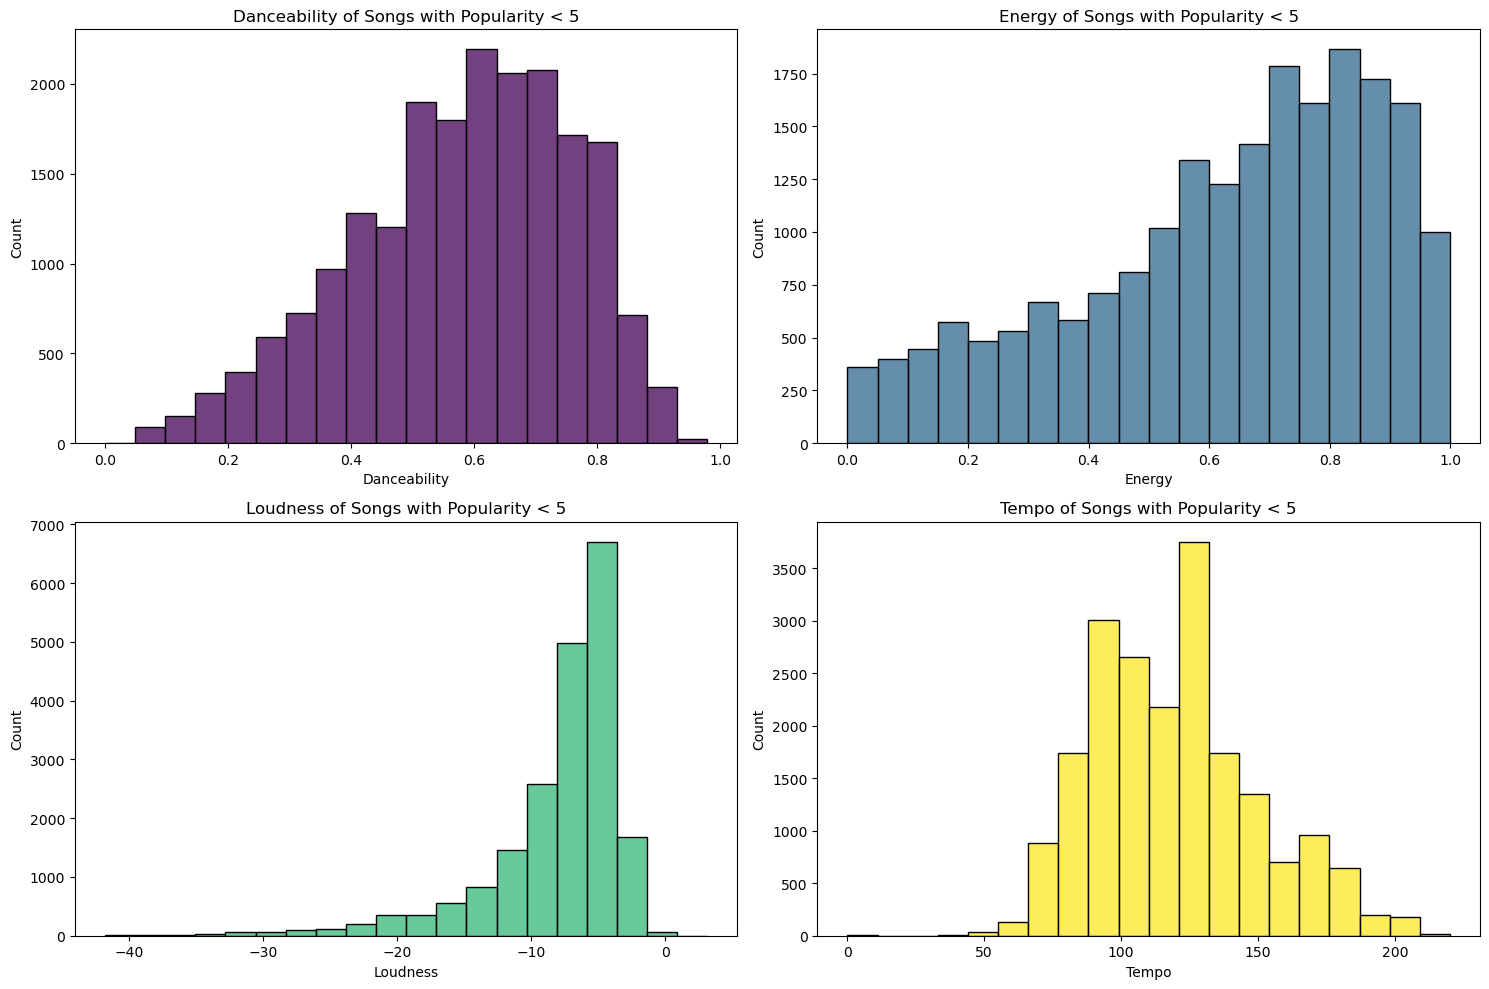

In [397]:
# Plot histogram of selected columns for low popularity songs
import matplotlib.cm as cm

columns_to_plot = ['danceability', 'energy', 'loudness', 'tempo']

# Calculate the number of rows needed for the grid
n = len(columns_to_plot)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

# Create a colormap with n colors
cmap = cm.get_cmap('viridis', n)

for i, (ax, column) in enumerate(zip(axes.flatten(), columns_to_plot)):
    sns.histplot(lowest_rated_songs[column], bins=20, color=cmap(i), ax=ax)
    ax.set_title(f"{column.capitalize()} of Songs with Popularity < 5")
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel("Count")

# Remove empty subplots
if n < nrows*ncols:
    for ax in axes.flatten()[n:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [421]:
# Calculate the mean loudness of each genre
genre_loudness = df.groupby('track_genre')['loudness'].mean().sort_values(ascending=False)

# Calculate the mean loudness of each genre for low popularity songs
low_pop_genre_loudness = lowest_rated_songs.groupby('track_genre')['loudness'].mean().sort_values(ascending=False)

print(genre_loudness.head(10), "\n\n", low_pop_genre_loudness.head(10))
#print(low_pop_genre_loudness.head(10))

diff = genre_loudness - low_pop_genre_loudness
diff.sum()

track_genre
j-idol          -3.771215
drum-and-bass   -4.159624
hardstyle       -4.345983
party           -4.411871
metalcore       -4.457694
reggaeton       -4.987124
dubstep         -5.063413
forro           -5.122201
latino          -5.176923
latin           -5.263596
Name: loudness, dtype: float64 

 track_genre
j-idol          -2.861500
drum-and-bass   -3.874333
party           -4.012598
metalcore       -4.024935
hardstyle       -4.474821
happy           -4.720510
reggaeton       -4.777843
latino          -4.851498
reggae          -4.865462
pagode          -5.019314
Name: loudness, dtype: float64


-8.504287336608446

According to the tables, it seems like low popularity loudness levels are generally higher than their corresponding population-wide genres.

# Tempo Distribution by Key

In [ ]:
# filter data by tempo and key
df_tempo_key = df[['tempo', 'key']]

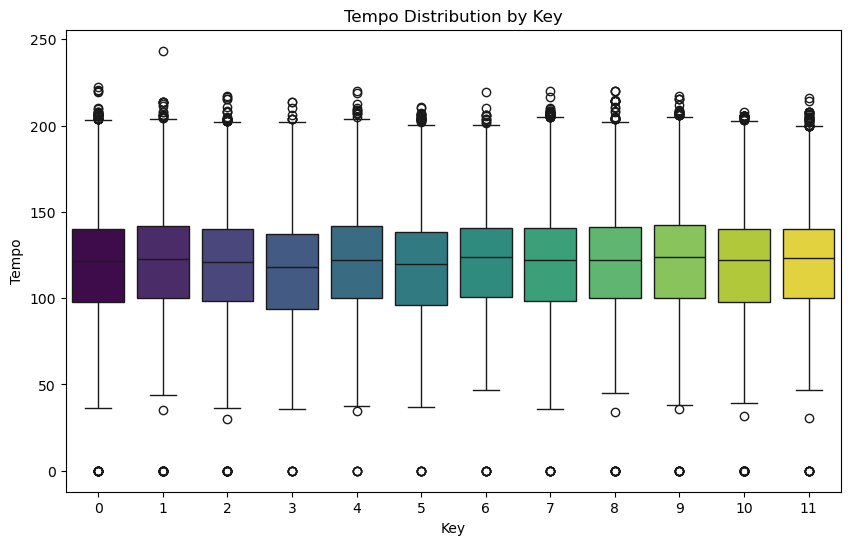

In [ ]:
# Plot the tempo distribution by key
plt.figure(figsize=(10, 6))
sns.boxplot(x='key', y='tempo', hue='key', data=df_tempo_key, palette='viridis', legend=False)
plt.title("Tempo Distribution by Key")
plt.xlabel("Key")
plt.ylabel("Tempo")
plt.show()

It seems like tempo is not correlated with the key. Tempo across all keys likes to sit around 120 BPM with a std ~30.

# Lowest and Highest Tempo Genres

In [433]:
mean_genre_tempo = df.groupby('track_genre')['tempo'].mean().sort_values()

# Reorder the dataframe by the mean duration
mean_genre_tempo_df = pd.DataFrame({'track_genre': mean_genre_tempo.index, 'tempo': mean_genre_tempo.values})

# Select the 5 smallest and 5 largest loudness genres
top_5_tempo = mean_genre_tempo.head(5).index.tolist()
bottom_5_tempo = mean_genre_tempo.tail(5).index.tolist()
select_tempo = top_5_tempo + bottom_5_tempo

filtered_df = mean_genre_tempo_df[mean_genre_tempo_df['track_genre'].isin(select_tempo)]

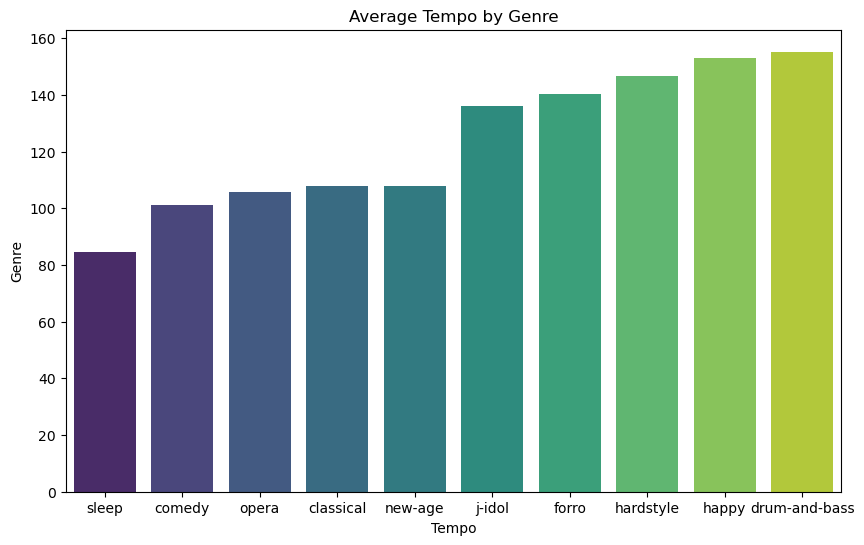

In [434]:
# Plot the mean duration by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='tempo', data=filtered_df, palette='viridis', hue='track_genre', legend=False)
plt.title("Average Tempo by Genre")
plt.xlabel("Tempo")
plt.ylabel("Genre")
plt.show()

# Graphing genre by loudness

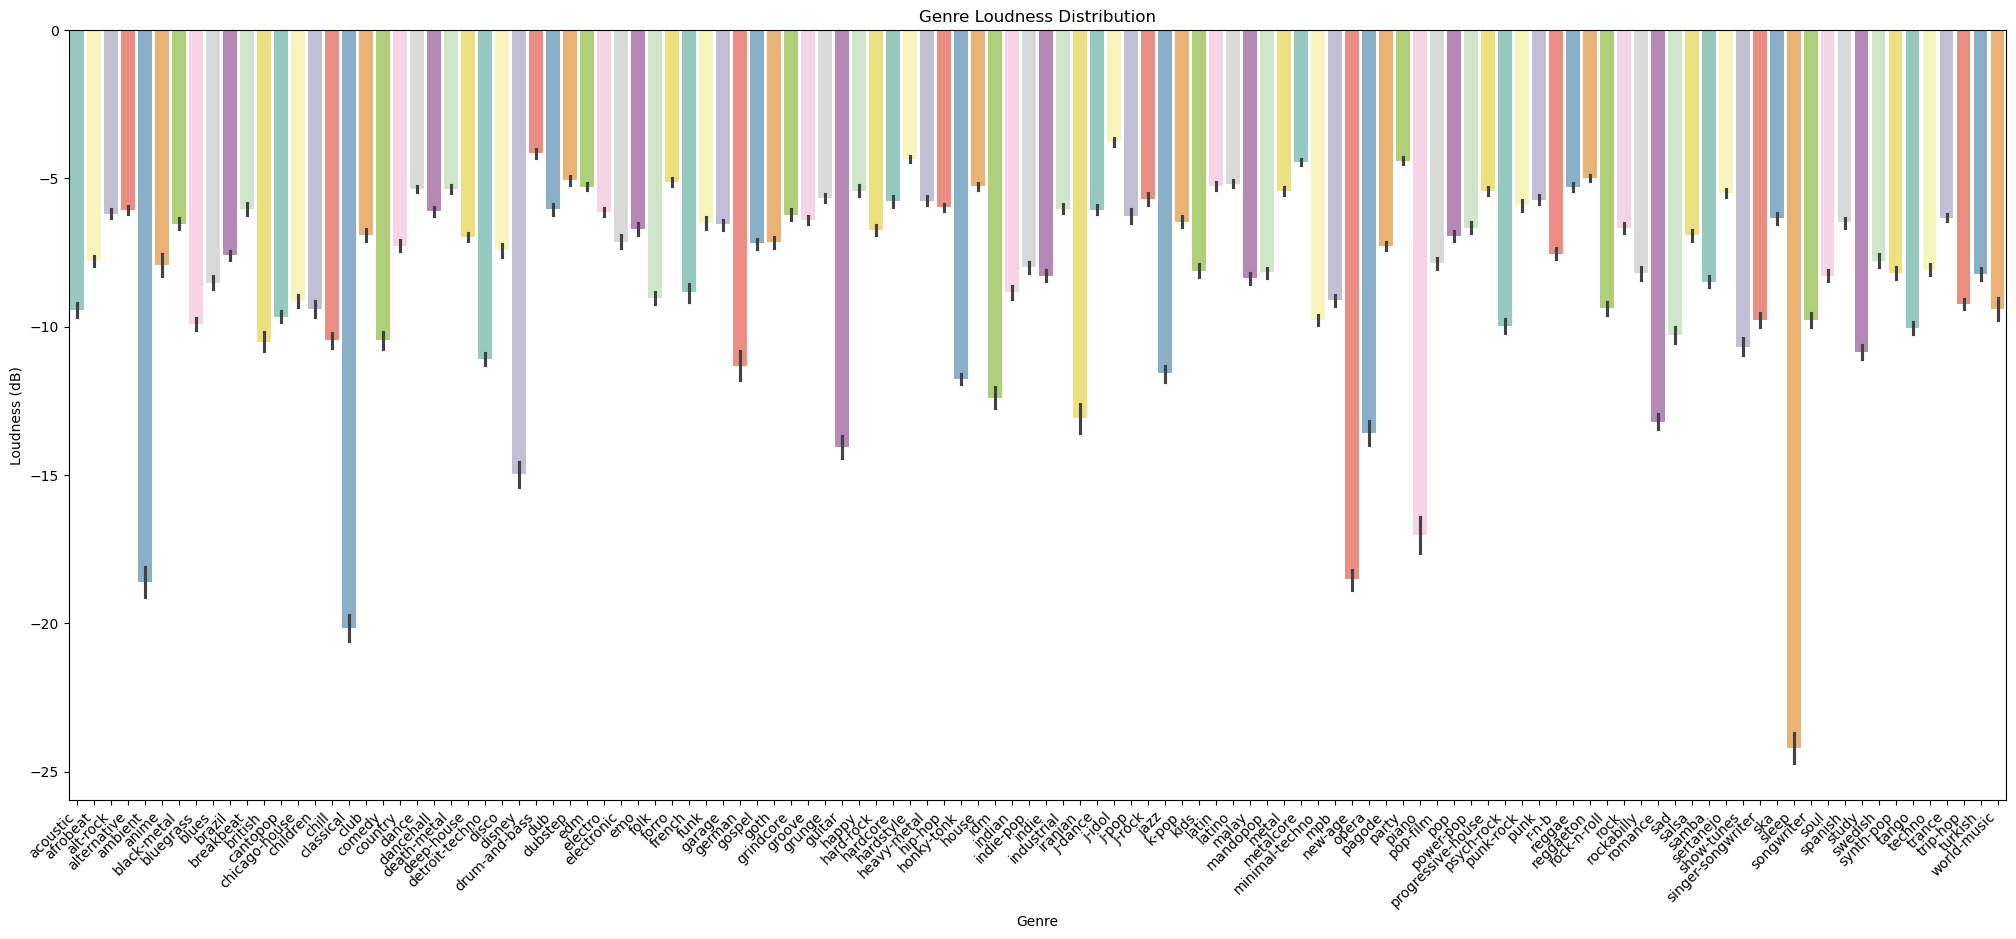

In [435]:
# Graphing genres by loudness, very busy graph
plt.figure(figsize=(25, 10))
sns.barplot(x='track_genre', y='loudness', data=df, palette='Set3', hue='track_genre', legend=False)
plt.title("Genre Loudness Distribution")
plt.xlabel("Genre")
plt.ylabel("Loudness (dB)")
plt.xticks(rotation=45, ha='right') 
plt.show()

From this graph, we can observe that some genres stand out by being noticably quieter than the other genres.

Using the code below, we can calculate the loudest and quietest genres.

In [480]:
# Find the mean loudness of each genre
genre_loudness = df.groupby('track_genre')['loudness'].mean().sort_values(ascending=False)

# List the top 10 genres with the lowest loudness
quietest = genre_loudness.tail(10)

# List the top 10 genres with the highest loudness
loudest = genre_loudness.head(10)

# print the results
print("Quietest Genres:\n\n", quietest, "\n\n\nLoudest Genres:\n\n", loudest)

Quietest Genres:

 track_genre
iranian     -13.080343
romance     -13.205726
opera       -13.575679
guitar      -14.050918
disney      -14.969963
piano       -17.013978
new-age     -18.520463
ambient     -18.601365
classical   -20.145216
sleep       -24.194084
Name: loudness, dtype: float64 


Loudest Genres:

 track_genre
j-idol          -3.771215
drum-and-bass   -4.159624
hardstyle       -4.345983
party           -4.411871
metalcore       -4.457694
reggaeton       -4.987124
dubstep         -5.063413
forro           -5.122201
latino          -5.176923
latin           -5.263596
Name: loudness, dtype: float64


In [481]:
# Select the 10 smallest and 10 largest loudness genres
loudness_sorted = df.groupby('track_genre')['loudness'].mean().sort_values()
top_5_genres = loudness_sorted.head(5).index.tolist()
bottom_5_genres = loudness_sorted.tail(5).index.tolist()
select_genres = top_5_genres + bottom_5_genres
print(select_genres)

['sleep', 'classical', 'ambient', 'new-age', 'piano', 'metalcore', 'party', 'hardstyle', 'drum-and-bass', 'j-idol']


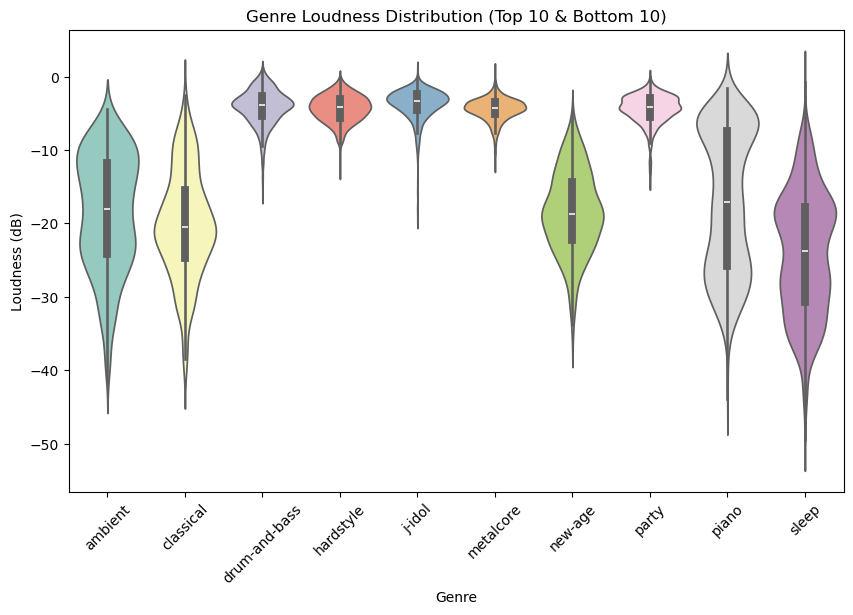

In [438]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='track_genre', y='loudness', hue='track_genre', legend=False, data=df[df['track_genre'].isin(select_genres)], palette='Set3')
plt.title("Genre Loudness Distribution (Top 10 & Bottom 10)")
plt.xlabel("Genre")
plt.ylabel("Loudness (dB)")
plt.xticks(rotation=45)
plt.show() 

# Graphing tempo and genre

In [482]:
# Calculate variation in tempo by genre
df['variation'] = df.groupby('track_genre')['tempo'].transform(lambda x: x.max() - x.min())

# Sort DataFrame by variation
filtered_df = df.sort_values(by='variation')

***Note***: *The graph below can be hard to read when all of the genres are included*

set pick10 = False in order to see all genres included

        pick10 = True selects 10 genres from the dataset.   

In [462]:
pick10 = True

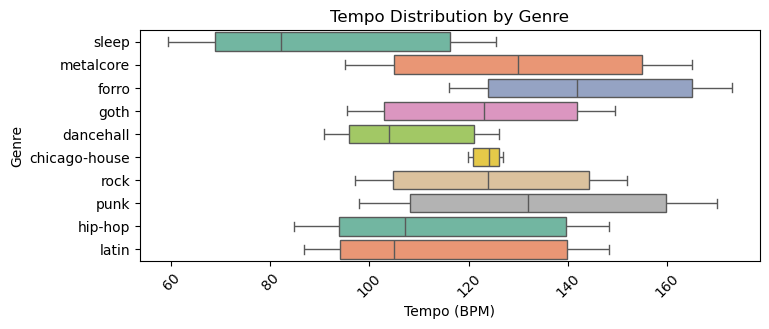

In [463]:
if pick10:

    filtered_df = filtered_df[filtered_df['track_genre'].isin(filtered_df['track_genre'].value_counts().head(10).index)]
    # Plot
    fig, ax = plt.subplots(figsize=(8,3))

    sns.boxplot(x='tempo', y='track_genre', data=filtered_df, palette='Set2', showfliers=False, order=filtered_df['track_genre'].unique(), ax=ax, whis=.2, hue='track_genre', legend=False)
    plt.title("Tempo Distribution by Genre")
    plt.xlabel("Tempo (BPM)")
    plt.ylabel("Genre")
    plt.xticks(rotation=45)
    plt.show()

else:
    # Sort DataFrame by variation
    filtered_df = df.sort_values(by='tempo')
    # Plot
    fig, ax = plt.subplots(figsize=(8, 20))

    sns.boxplot(x='tempo', y='track_genre', data=filtered_df, palette='Set2', showfliers=False, order=filtered_df['track_genre'].unique(), ax=ax, whis=.2, hue='track_genre', legend=False)
    plt.suptitle("(sorted by tempo)", fontsize=12, y=0.893)  # Add subheading
    plt.title("Tempo Distribution by Genre", fontsize=16, y=1.02)  # Adjust y position to accommodate subheading
    plt.xlabel("Tempo (BPM)")
    plt.ylabel("Genre")
    plt.xticks(rotation=45)
    plt.show()  

# Top correlations between numerical variables

In [488]:
# Select numerical columns
selected_columns = ['popularity', 'loudness', 'tempo', 'speechiness', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']
numerical_data = df[selected_columns].dropna().values

correlation_matrix = np.corrcoef(numerical_data.T)  # Transpose to have variables on the correct axis

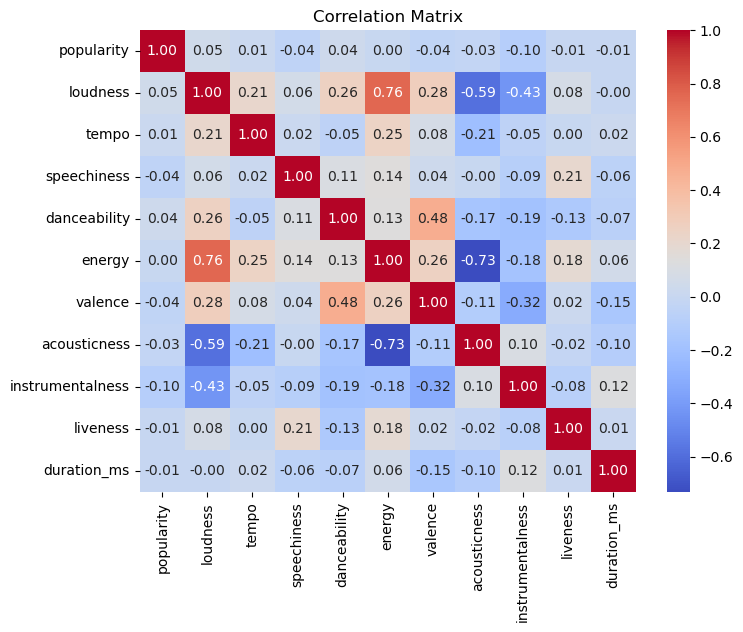

In [489]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=selected_columns, yticklabels=selected_columns)
plt.title("Correlation Matrix")
plt.show()

We can analyze a correlation matrix to find any more patterns in the data.

Highlights:
* Energy and Loudness are positively correlated (.76)
* Valence and Danceability are positively correlated (.48)
* Energy and Tempo are positively correlated (.25)

* Acousticness and Energy and negatively correlated (-.73)
* Instrumentalness and Loudness and negatively correlated (-.73)
* Valence and Loudness are negatively correlated (-.43)

Energy and Tempo are less positively correlated than I would have expected.
Popularity has the least correlation with the other columns, which is really interesting.

## Final Thoughts

This dataset was fun to go through and find patterns, and there are a few key takeaways from this EDA. 
1. Popularity is very hard to determine. There are no real patterns that you can use to predict whether a song is popular or not, at least, not from this dataset alone. 
1. As a general trend, songs tend to be more popular the more: loud, danceable, explicit, and short they are.
1. The most popular songs demonstrate high variance among other categories, which hints at a hypothesis that very popular songs display unique characteristics that arent represented in this dataset, such as novelty.